# W 态 (W-state)

量子W态是一个特殊类型的多体纠缠量子态，常见于三个或更多量子比特（qubits）系统中。W态是研究多体量子系统、量子信息处理和量子通信等领域中非常重要的资源。

在量子机器学习领域中，W 态可以为量子机器学习算法提供潜在的增强和优势。虽然量子机器学习目前仍处于探索阶段，W 态等纠缠态在以下几个方面可能对机器学习特别有用：

1. 数据编码和特征表示
在量子机器学习中，数据的量子编码是核心步骤之一。W 态因其特有的纠缠特性，能够在多个量子比特间共享信息，这可能有助于更有效地表示和处理复杂数据集。例如，在量子神经网络中，W 态可以用来创建涉及多个量子比特的复杂特征表示，从而捕获数据中的多维关系。

2. 增强学习模型的鲁棒性
由于 W 态具有较高的纠缠鲁棒性，即使在部分量子比特损失或出现噪声的情况下，仍能保持系统的一部分纠缠。这种特性可能使得基于 W 态的量子机器学习模型在面对量子系统的不可避免的噪声和误差时，展现出更好的鲁棒性。

## 定义

对于一个包含\( N \)个量子比特的系统，W态可以被定义为：
$ |W_N\rangle = \frac{1}{\sqrt{N}} (|100...0\rangle + |010...0\rangle + ... + |000...1\rangle) $
这里，每个量子比特的基态都有一个处于 $ |1\rangle $ 的状态，而其它所有量子比特均处于 $ |0\rangle $ 的状态，且每个这样的组合都以相同的概率幅 $ \frac{1}{\sqrt{N}} $ 出现。

## 特性

1. **对称性**：W态是对称的，即任何两个量子比特的交换不会改变整体的量子态。这意味着所有的量子比特在这个状态下是完全等价的。

2. **稳健的纠缠**：相对于其他类型的多体纠缠态（如GHZ态），W态在面对量子比特丢失的情况下显示出更强的纠缠稳健性。即使从W态中丢失一个量子比特，剩余的量子比特仍保持某种形式的纠缠。

3. **局部可区分性**：W态中的单个量子比特状态是局部可区分的，这是因为每个量子比特的局部测量都可以给出关于整个全局状态的信息。

## 生成 W 态

在实验上，生成 W 态可以通过多种量子操作实现，包括使用光学系统、超导量子比特、离子阱技术等。通过精心设计的量子逻辑门和适当的初始化可以逐步构建和纠缠量子比特。

制备 W 态需要利用RBS门，在量子计算中，RBS门（Rotational Beam Splitter Gate）是一种两量子比特门。这种门主要用于实现量子比特之间的受控旋转操作，从而在不同的量子态之间进行转换。RBS门是量子算法中实现量子纠缠和量子逻辑操作的重要工具之一 [1]。

### RBS门的数学表示

RBS门可以表示为一个4x4的幺正矩阵，其作用在两个量子比特上。RBS门的一种常见形式由参数 $\theta$ 控制，该参数描述了量子态之间的转换角度。RBS门的矩阵形式通常定义为：

$$
U_{\text{RBS}}(\theta) = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos(\theta) & -\sin(\theta) & 0 \\
0 & \sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

在这个矩阵中，非对角线上的余弦和正弦项指明了两个量子比特状态之间的耦合强度。这种配置允许RBS门在量子态 $\ket{01}$ 和 $\ket{10}$ 之间进行受控的旋转。

### 生成 4-qubit W 态

#### 方案一（线路深度 O（N））

{'0100': (259, tensor(0.2500)), '1000': (247, tensor(0.2500)), '0001': (271, tensor(0.2500)), '0010': (247, tensor(0.2500))}


<BarContainer object of 4 artists>

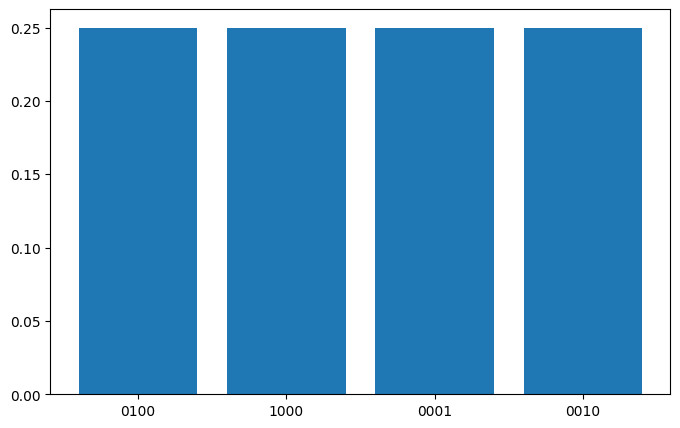

In [25]:
import deepquantum as dq
import numpy as np
import matplotlib.pyplot as plt

cir = dq.QubitCircuit(4)
# 可以用X门来任意设置初态中1的个数
cir.x(0)
# 可以任意添加RBS门
cir.rbs([0,1],np.arccos(1/np.sqrt(4)))
cir.rbs([1,2],np.arccos(1/np.sqrt(3)))
cir.rbs([2,3],np.arccos(1/np.sqrt(2)))
cir.barrier()

cir()
res=cir.measure(with_prob= True) # 打印测量结果，所有可能末态的1的个数一定与初态相同
print(res)

# 将数据分解为X和Y轴的值
labels = list(res.keys())
values = [value[1] for value in res.values()]

# 创建条形图
plt.figure(figsize=(8, 5))  # 设置图形大小
plt.bar(labels, values)  # 绘制条形图

画出对应的量子线路图

c:\Users\HP\.conda\envs\dq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


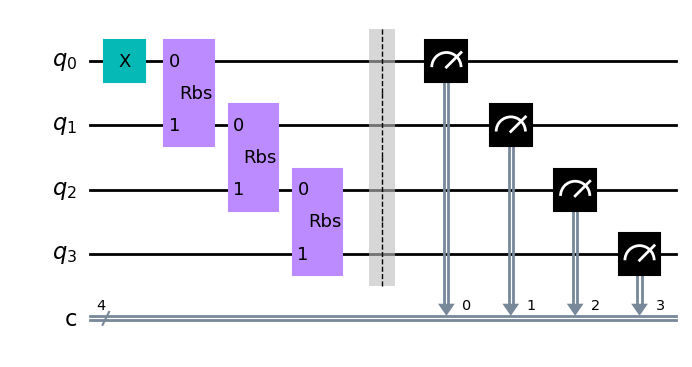

In [26]:
cir.draw()

#### 方案二（线路深度 O（N/2））

{'0010': (270, tensor(0.2500)), '0001': (241, tensor(0.2500)), '0100': (266, tensor(0.2500)), '1000': (247, tensor(0.2500))}


<BarContainer object of 4 artists>

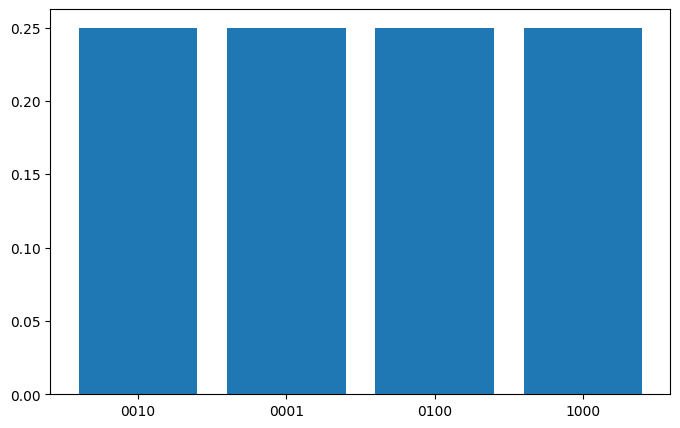

In [27]:
import deepquantum as dq
import numpy as np
import matplotlib.pyplot as plt

cir = dq.QubitCircuit(4)
# 可以用X门来任意设置初态中1的个数
cir.x(1)
# 可以任意添加RBS门
cir.rbs([1,2],np.arccos(np.sqrt(2)/np.sqrt(4)))
cir.rbs([0,1],np.arccos(np.sqrt(1)/np.sqrt(2)))
cir.rbs([2,3],np.arccos(np.sqrt(1)/np.sqrt(2)))

cir.barrier()

cir()
res=cir.measure(with_prob= True) # 打印测量结果，所有可能末态的1的个数一定与初态相同
print(res)

# 将数据分解为X和Y轴的值
labels = list(res.keys())
values = [value[1] for value in res.values()]

# 创建条形图
plt.figure(figsize=(8, 5))  # 设置图形大小
plt.bar(labels, values)  # 绘制条形图

画出对应的量子线路图

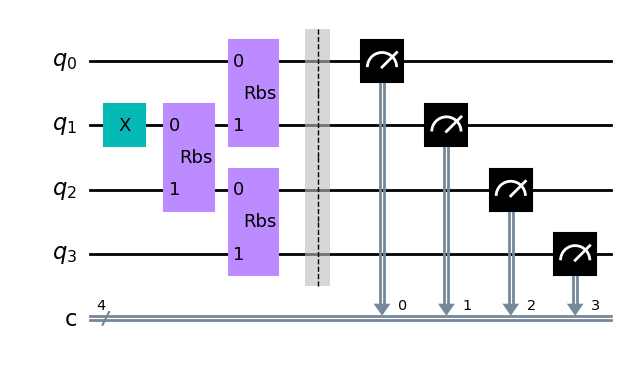

In [28]:
cir.draw()

#### 方案三（线路深度 O（log(N)））

{'1000': (246, tensor(0.2500)), '0010': (266, tensor(0.2500)), '0001': (253, tensor(0.2500)), '0100': (259, tensor(0.2500))}


<BarContainer object of 4 artists>

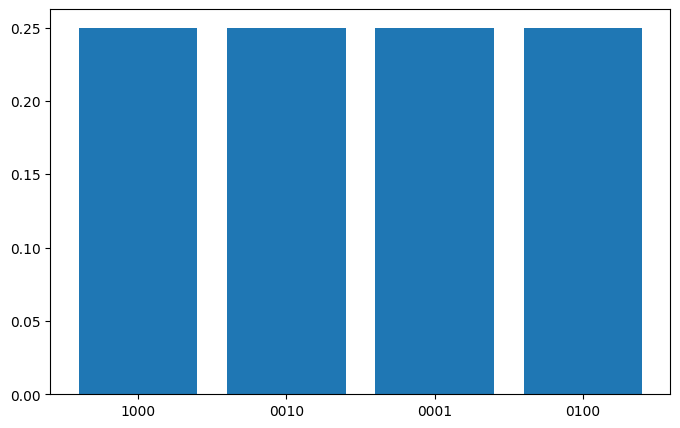

In [29]:
import deepquantum as dq
import numpy as np
import matplotlib.pyplot as plt

cir = dq.QubitCircuit(4)
# 可以用X门来任意设置初态中1的个数
cir.x(0)
# 可以任意添加RBS门
cir.rbs([0,2],np.arccos(np.sqrt(2)/np.sqrt(4)))
cir.rbs([0,1],np.arccos(np.sqrt(1)/np.sqrt(2)))
cir.rbs([2,3],np.arccos(np.sqrt(1)/np.sqrt(2)))

cir.barrier()

cir()
res=cir.measure(with_prob= True) # 打印测量结果，所有可能末态的1的个数一定与初态相同
print(res)

# 将数据分解为X和Y轴的值
labels = list(res.keys())
values = [value[1] for value in res.values()]

# 创建条形图
plt.figure(figsize=(8, 5))  # 设置图形大小
plt.bar(labels, values)  # 绘制条形图

画出对应的量子线路图

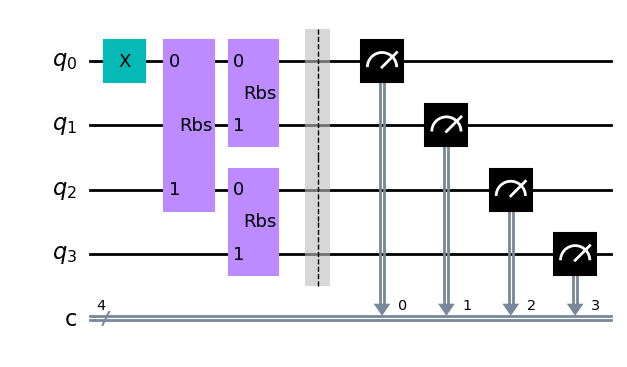

In [30]:
cir.draw()

### 生成 n-qubit W 态

基于方案三的 O（log(N)）线路深度，我们可以利用递归的方法，设计生成 n-qubit W 态的通用线路：

In [31]:
import deepquantum as dq
import numpy as np
def distribute_shares(cir,a, b):
    # 基本情况：如果区间只有一个元素，则不需要进一步分配
    if a == b:
        return
    
    # 计算当前区间的总元素数
    total_elements = b - a + 1
    # 寻找划分的中点
    midpoint = (a + b) // 2
    # 计算左右分区的元素数
    left_elements = midpoint - a + 1

    cir.rbs([a,midpoint+1],np.arccos(np.sqrt(left_elements)/np.sqrt(total_elements)))

    # 递归地在左右分区分配份数
    distribute_shares(cir,a, midpoint)
    distribute_shares(cir,midpoint + 1, b)

def distribute(N):

    cir = dq.QubitCircuit(N)
    cir.x(0)
    distribute_shares(cir,0, N-1)
    return cir

设置 N=10，我们可以观察生成的 n-qubit W 态：

{'0000001000': (112, tensor(0.1000)), '0000000001': (121, tensor(0.1000)), '0010000000': (102, tensor(0.1000)), '0000000100': (97, tensor(0.1000)), '1000000000': (98, tensor(0.1000)), '0000010000': (101, tensor(0.1000)), '0100000000': (97, tensor(0.1000)), '0000100000': (97, tensor(0.1000)), '0001000000': (98, tensor(0.1000)), '0000000010': (101, tensor(0.1000))}


<BarContainer object of 10 artists>

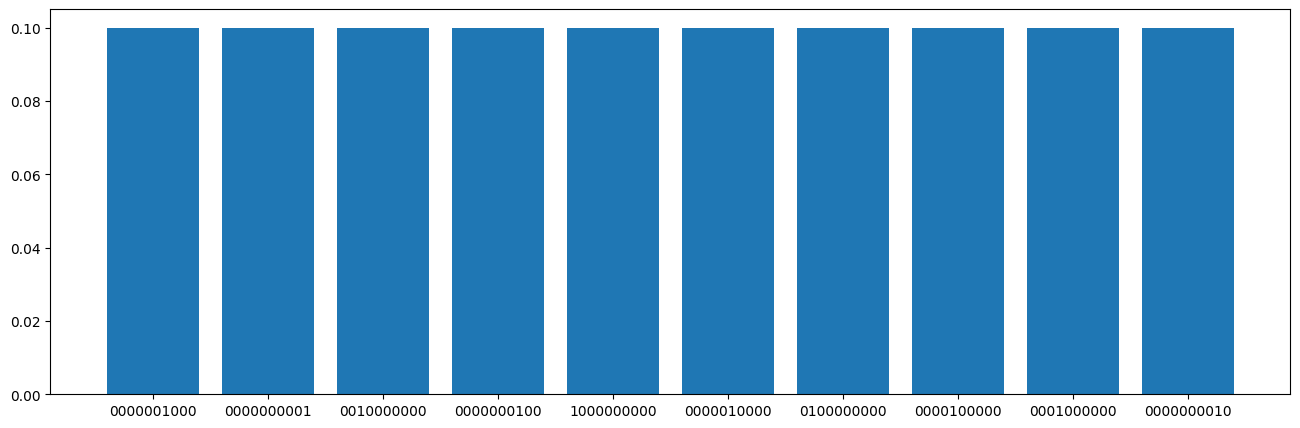

In [32]:
# 示例用法
N=10
cir=distribute(N)
cir.barrier()
cir()

res=cir.measure(with_prob= True) # 打印测量结果，所有可能末态的1的个数一定与初态相同
print(res)

# 将数据分解为X和Y轴的值
labels = list(res.keys())
values = [value[1] for value in res.values()]

# 创建条形图
plt.figure(figsize=(16, 5))  # 设置图形大小
plt.bar(labels, values)  # 绘制条形图

画出对应的量子线路图

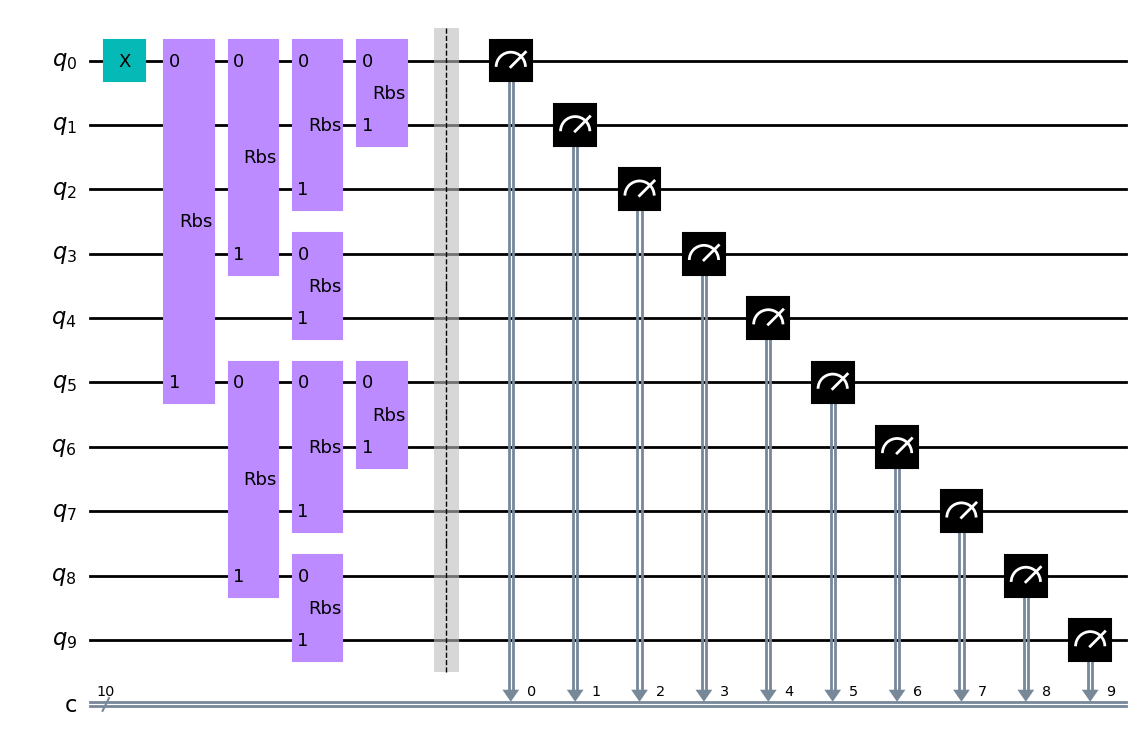

In [33]:
cir.draw()

## 参考文献

[1] Landman J, Mathur N, Li Y Y, et al. Quantum methods for neural networks and application to medical image classification[J]. Quantum, 2022, 6: 881.